# WiDS Datathon 2021, Wrangling the Data
## 1. Initial Look at the DF
Summarizing the raw df:
- what is the shape of the data?
- what is the target variable? and its distribution?
- how many nulls?
- identify outliers/anomalies
- and more...

## 2. Prepping the Data for Exploration and Modeling
Taking care of questions addressed above:
- impute or remove nulls
- handle outliers
- split into train/validate/test

## 3. Add Code into Functions in a .py File

In [84]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# reading csv file into a pandas dataframe
df = pd.read_csv('data/TrainingWiDS2021.csv', index_col=0)

In [14]:
# checking the shape of the data
print('There are', df.shape[1], 'columns and', df.shape[0], 'observations in the df.')

There are 180 columns and 130157 observations in the df.


In [16]:
print('Columns in the df are:')
df.columns.to_list()

Columns in the df are:


['encounter_id',
 'hospital_id',
 'age',
 'bmi',
 'elective_surgery',
 'ethnicity',
 'gender',
 'height',
 'hospital_admit_source',
 'icu_admit_source',
 'icu_id',
 'icu_stay_type',
 'icu_type',
 'pre_icu_los_days',
 'readmission_status',
 'weight',
 'albumin_apache',
 'apache_2_diagnosis',
 'apache_3j_diagnosis',
 'apache_post_operative',
 'arf_apache',
 'bilirubin_apache',
 'bun_apache',
 'creatinine_apache',
 'fio2_apache',
 'gcs_eyes_apache',
 'gcs_motor_apache',
 'gcs_unable_apache',
 'gcs_verbal_apache',
 'glucose_apache',
 'heart_rate_apache',
 'hematocrit_apache',
 'intubated_apache',
 'map_apache',
 'paco2_apache',
 'paco2_for_ph_apache',
 'pao2_apache',
 'ph_apache',
 'resprate_apache',
 'sodium_apache',
 'temp_apache',
 'urineoutput_apache',
 'ventilated_apache',
 'wbc_apache',
 'd1_diasbp_invasive_max',
 'd1_diasbp_invasive_min',
 'd1_diasbp_max',
 'd1_diasbp_min',
 'd1_diasbp_noninvasive_max',
 'd1_diasbp_noninvasive_min',
 'd1_heartrate_max',
 'd1_heartrate_min',
 'd1_mbp

### There are a large amount of columns in the data. Will these all be useful? Can some be removed due to poor data quality (high nulls)?

In [46]:
# creating dataframe of null count for each column
null_counts = pd.DataFrame(df.isnull().sum())

# renaming count column
null_counts.columns = ['nulls']

In [56]:
# creating column in null counts for the percentage of the column that is nulls
null_counts['percent'] = round((null_counts.nulls / df.shape[0]) * 100,2)

In [72]:
# checking how many column have a null percentage greater than 50
null_counts[null_counts.percent > 50]

,nulls,percent
albumin_apache,78163,60.05
bilirubin_apache,82560,63.43
fio2_apache,99720,76.62
paco2_apache,99720,76.62
paco2_for_ph_apache,99720,76.62
...,...,...
h1_arterial_ph_min,107849,82.86
h1_arterial_po2_max,107445,82.55
h1_arterial_po2_min,107445,82.55
h1_pao2fio2ratio_max,113397,87.12


### Data Quality
- 20 columns have no null values
- 79 columns have greater than 20% nulls
- 73 columns have more than half nulls

## What should be removed?
- I will set a threshold of nulls percentage, and remove any columns or rows more than this threshold
- starting at 50% nulls, will determine later if a lower or higher threshold is needed

In [73]:
# Removing Nulls from Columns
# sets thresh hold to 75 percent nulls, if more than %25 nulls it will be removed
threshold = df.shape[0] * .50

# remove columns with specified threshold
df = df.dropna(axis=1, thresh=threshold)
    
# Removing Nulls from Rows
# sets thresh hold to 75 percent nulls, if more than %25 nulls it will be removed
thresh_hold = df.shape[1] * .50

# remove rows with specified threshold
df = df.dropna(axis=0,thresh=thresh_hold)

In [81]:
print('   The df now has', df.shape[1], 'rows with', df.shape[0], 'observations. \nIt originally had 180 columns and 130157 observations before removing nulls above 50% in the columns and rows.')

   The df now has 107 rows with 129962 observations. 
It originally had 180 columns and 130157 observations before removing nulls above 50% in the columns and rows.


## Visualizing Distribution of the Target Variable
- diabetes_mellitus, if the patient has been diagnosed with diabetes
- binary value
- 1 if diagnosed with diabetes, 0 if not

Text(0.5, 1.0, 'Distribution of Diabetic Patients')

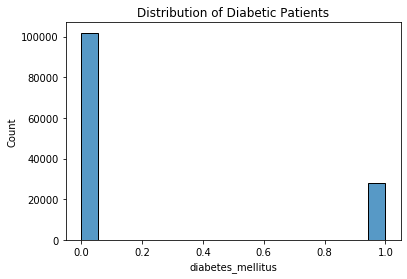

In [90]:
sns.histplot(df.diabetes_mellitus)
plt.title('Distribution of Diabetic Patients')

In [91]:
df.diabetes_mellitus.value_counts()

0    101837
1     28125
Name: diabetes_mellitus, dtype: int64

## Most patients in the dataset are not diabetic